In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load dataset
data = pd.read_csv("/content/Mall_Customers.csv")

In [21]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


In [22]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [23]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


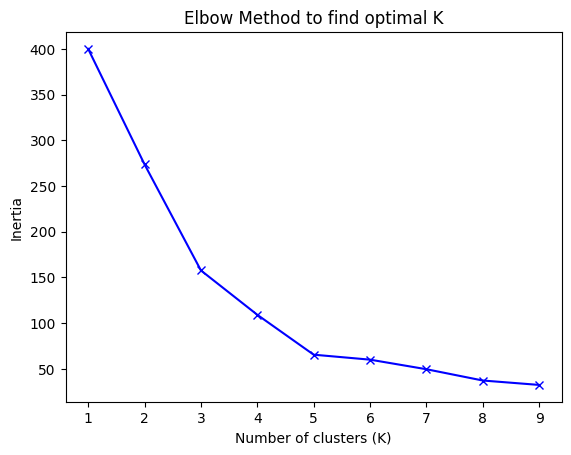

In [25]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to find optimal K')
plt.show()


In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_


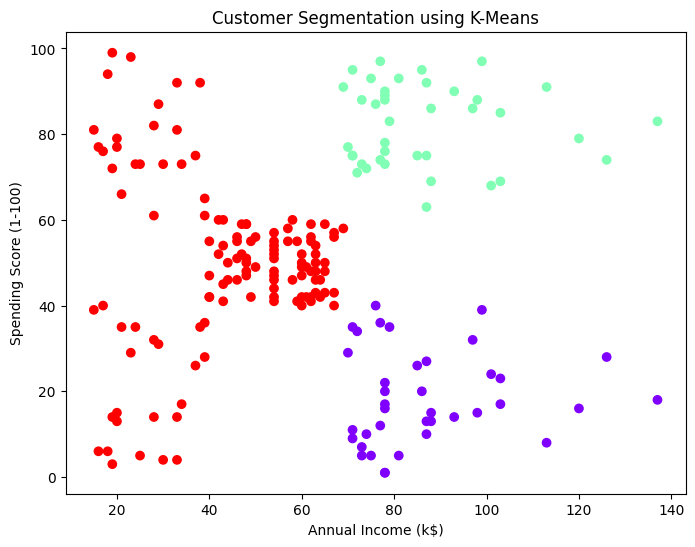

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.show()

In [28]:
print(data.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)', 'Age']].mean())

         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 87.000000               18.631579  40.394737
1                 86.538462               82.128205  32.692308
2                 44.154472               49.829268  40.325203


In [19]:
data.to_csv('clustered_customers.csv', index=False)
